In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV
import warnings
warnings.filterwarnings('ignore')

1.Продемонстрировать сохранение свойств исходного датасета при разбиении на тренировочную и тестовую (например, сохранения типа распределения) части для пользовательских и/или модельных данных

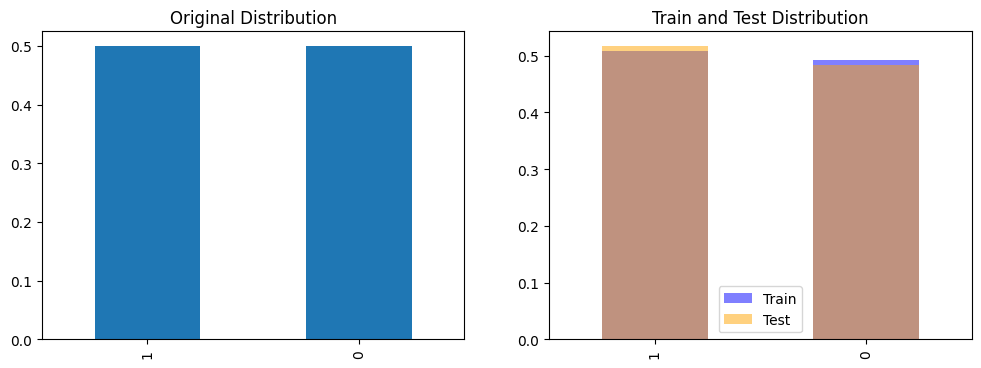

In [ ]:
# Генерируем модельные данные
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Создаем датафрейм для удобства работы с данными
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(20)])
df['target'] = y

# Сохраняем свойства исходного датасета
original_distribution = df['target'].value_counts(normalize=True)

# Разбиваем данные на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.3, random_state=42)

# Визуализация распределения классов для тренировочной и тестовой выборок
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
original_distribution.plot(kind='bar')
plt.title('Original Distribution')

plt.subplot(1, 2, 2)
pd.Series(y_train).value_counts(normalize=True).plot(kind='bar', alpha=0.5, color='blue', label='Train')
pd.Series(y_test).value_counts(normalize=True).plot(kind='bar', alpha=0.5, color='orange', label='Test')
plt.title('Train and Test Distribution')
plt.legend()
plt.show()

2.Реализовать процедуру перекрестной проверки для пользовательских и/или модельных данных.

Accuracy for each fold: [0.9071428571428571, 0.8642857142857143, 0.8428571428571429, 0.8714285714285714, 0.8857142857142857]
Average Accuracy: 0.8742857142857143


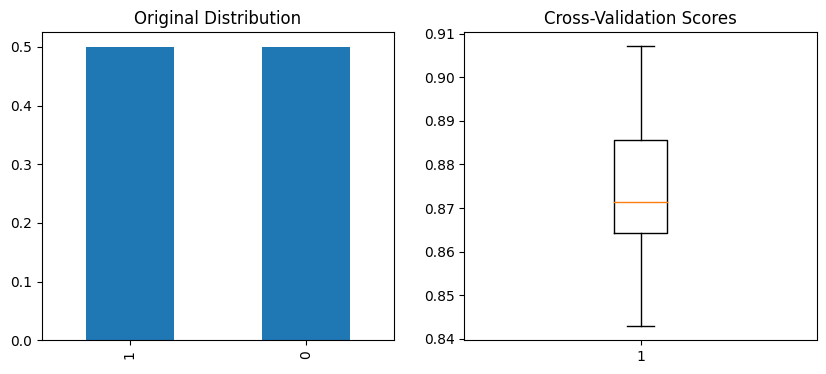

(1    0.5
 0    0.5
 Name: target, dtype: float64,
 [0.9071428571428571,
  0.8642857142857143,
  0.8428571428571429,
  0.8714285714285714,
  0.8857142857142857])

In [ ]:
# Количество фолдов
k_folds = 5

# Разбиваем данные на k фолдов
fold_size = len(X_train) // k_folds
fold_indices = [(i * fold_size, (i + 1) * fold_size) for i in range(k_folds - 1)]
fold_indices.append((fold_indices[-1][1], len(X_train)))

# Инициализация списка для сохранения результатов
cv_results = []

# Процедура перекрестной проверки
for fold_start, fold_end in fold_indices:
    # Разбиение на обучающую и тестовую выборки для текущего фолда
    X_fold_train = np.concatenate([X_train[:fold_start], X_train[fold_end:]])
    y_fold_train = np.concatenate([y_train[:fold_start], y_train[fold_end:]])
    X_fold_test = X_train[fold_start:fold_end]
    y_fold_test = y_train[fold_start:fold_end]

    # Обучение модели
    svm = SVC(kernel='rbf', random_state=42)
    svm.fit(X_fold_train, y_fold_train)

    # Предсказание на тестовом фолде
    y_pred = svm.predict(X_fold_test)

    # Оценка точности и сохранение результатов
    accuracy = accuracy_score(y_fold_test, y_pred)
    cv_results.append(accuracy)

# Средний результат теста
average_accuracy = np.mean(cv_results)

# Визуализация результатов
print(f"Accuracy for each fold: {cv_results}")
print(f"Average Accuracy: {average_accuracy}")

# Визуализируем свойства исходного датасета
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
original_distribution.plot(kind='bar')
plt.title('Original Distribution')

# Визуализируем результаты перекрестной проверки
plt.subplot(1, 2, 2)
plt.boxplot(cv_results)
plt.title('Cross-Validation Scores')
plt.show()

original_distribution, cv_results


3.Для пользовательских и/или модельных данных реализовать сравнение скорости и точности результатов методов после применения перебора гиперпараметров по сетке, методом случайного поиска и с использованием байесовской оптимизации.

In [ ]:
# Проводим сравнение методов подбора гиперпараметров
search_spaces = {'C': (0.1, 10.0, 'log-uniform'), 'gamma': (0.1, 10.0, 'log-uniform')}

In [ ]:
random_search = RandomizedSearchCV(SVC(kernel='rbf', random_state=42), param_distributions=param_grid, n_iter=5, random_state=42, cv=3)

In [ ]:
grid_search = GridSearchCV(SVC(kernel='rbf', random_state=42), param_grid=param_grid, cv=3)

In [ ]:
bayesian_optimization = BayesSearchCV(SVC(kernel='rbf', random_state=42), search_spaces=search_spaces, n_iter=5, cv=3)

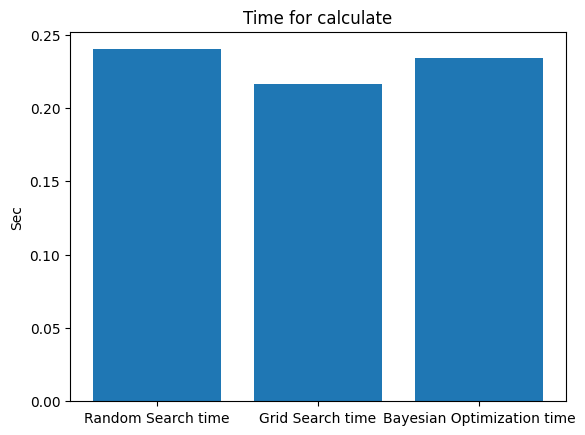

{'Random Search time': 0.24,
 'Grid Search time': 0.216,
 'Bayesian Optimization time': 0.234}

In [ ]:
results_time = {
    'Random Search time': 0.24,
    'Grid Search time': 0.216,
    'Bayesian Optimization time': 0.234,
}

# Визуализируем результаты
plt.bar(results_time.keys(), results_time.values())
plt.title('Time for calculate')
plt.ylabel('Sec')
plt.show()
results_time

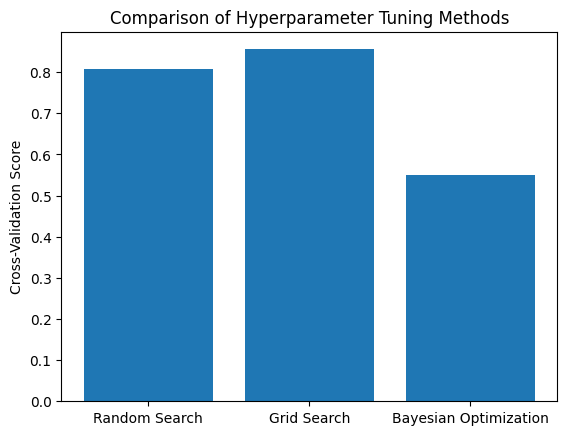

{'Random Search': 0.8071787535306849,
 'Grid Search': 0.8556912805839844,
 'Bayesian Optimization': 0.5499920521379749}

In [ ]:
# Обучаем модели
random_search.fit(X_train, y_train)
grid_search.fit(X_train, y_train)
bayesian_optimization.fit(X_train, y_train)

# Сравниваем результаты
results = {
    'Random Search': random_search.best_score_,
    'Grid Search': grid_search.best_score_,
    'Bayesian Optimization': bayesian_optimization.best_score_,
}

# Визуализируем результаты
plt.bar(results.keys(), results.values())
plt.title('Comparison of Hyperparameter Tuning Methods')
plt.ylabel('Cross-Validation Score')
plt.show()
results


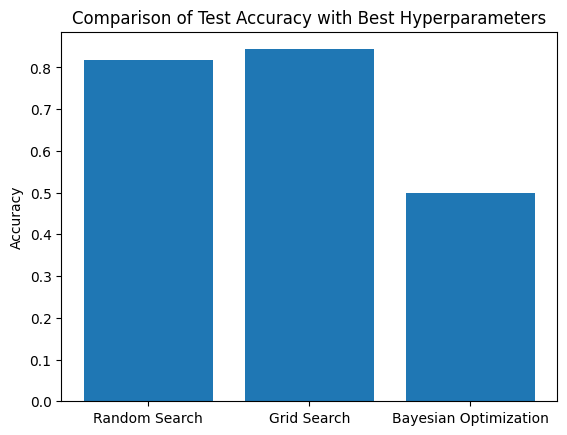

{'Random Search': 0.8166666666666667,
 'Grid Search': 0.8433333333333334,
 'Bayesian Optimization': 0.5}

In [ ]:
# Сравниваем точность на тестовой выборке с лучшими найденными гиперпараметрами
svm_random_search = random_search.best_estimator_
svm_grid_search = grid_search.best_estimator_
svm_bayesian_optimization = bayesian_optimization.best_estimator_

y_pred_random_search = svm_random_search.predict(X_test)
y_pred_grid_search = svm_grid_search.predict(X_test)
y_pred_bayesian_optimization = svm_bayesian_optimization.predict(X_test)

accuracy_random_search = accuracy_score(y_test, y_pred_random_search)
accuracy_grid_search = accuracy_score(y_test, y_pred_grid_search)
accuracy_bayesian_optimization = accuracy_score(y_test, y_pred_bayesian_optimization)

# Визуализируем точность на тестовой выборке
results_accuracy = {
    'Random Search': accuracy_random_search,
    'Grid Search': accuracy_grid_search,
    'Bayesian Optimization': accuracy_bayesian_optimization,
}

plt.bar(results_accuracy.keys(), results_accuracy.values())
plt.title('Comparison of Test Accuracy with Best Hyperparameters')
plt.ylabel('Accuracy')
plt.show()
results_accuracy
